In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data.csv')

In [2]:
df.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [3]:
import networkx as nx
mygraph = nx.Graph()

In [4]:
mygraph = nx.from_pandas_edgelist(df, 'source', 'target','value')

In [5]:
print('Nodes:',len(mygraph.nodes()),'Edges: ',len(mygraph.edges()))

Nodes: 115 Edges:  245


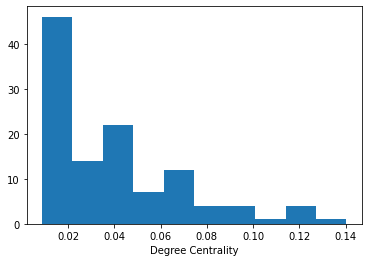

In [6]:
deg_cent = list(nx.degree_centrality(mygraph).values())
plt.hist(deg_cent)
plt.xlabel("Degree Centrality")
plt.show()

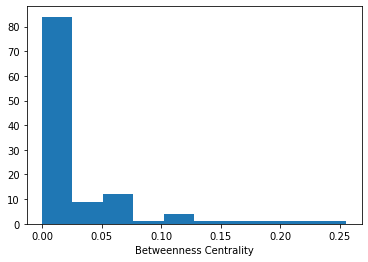

In [7]:
bet_cent = list(nx.betweenness_centrality(mygraph).values())
plt.hist(bet_cent)
plt.xlabel("Betweenness Centrality")
plt.show()

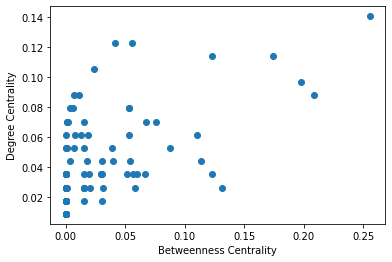

In [8]:
plt.scatter(list(nx.betweenness_centrality(mygraph).values()),deg_cent)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Degree Centrality')
plt.show()

In [9]:
def show_connected_components(G):
    def connected_component_subgraphs(G):
        for c in nx.connected_components(G):
            yield G.subgraph(c)

    ccs = list(connected_component_subgraphs(mygraph))
    largest_ccs = sorted(ccs, key=lambda x: len(x))[-1]
    sizes = [len(x) for x in list(ccs)]
    bucket_width = 5
    plt.hist(sizes,bins=list(range(0,max(sizes)+bucket_width,bucket_width)))
    plt.xlabel('Size of Connected Components')
    plt.ylabel('Number of Components')
    plt.show()
    return largest_ccs

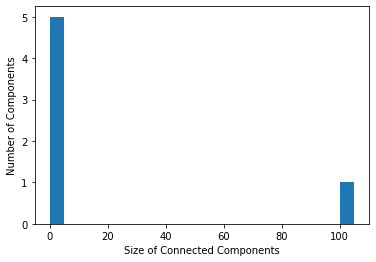

In [10]:
largest_ccs = show_connected_components(mygraph)

In [11]:
from operator import itemgetter
def show_ego(G,index_val,rad):
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1),reverse=True)[index_val-1]
    hub_ego = nx.ego_graph(G, largest_hub,radius=rad)
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=True)
    options = {"node_size": 300, "node_color": "r"}
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
    plt.show()

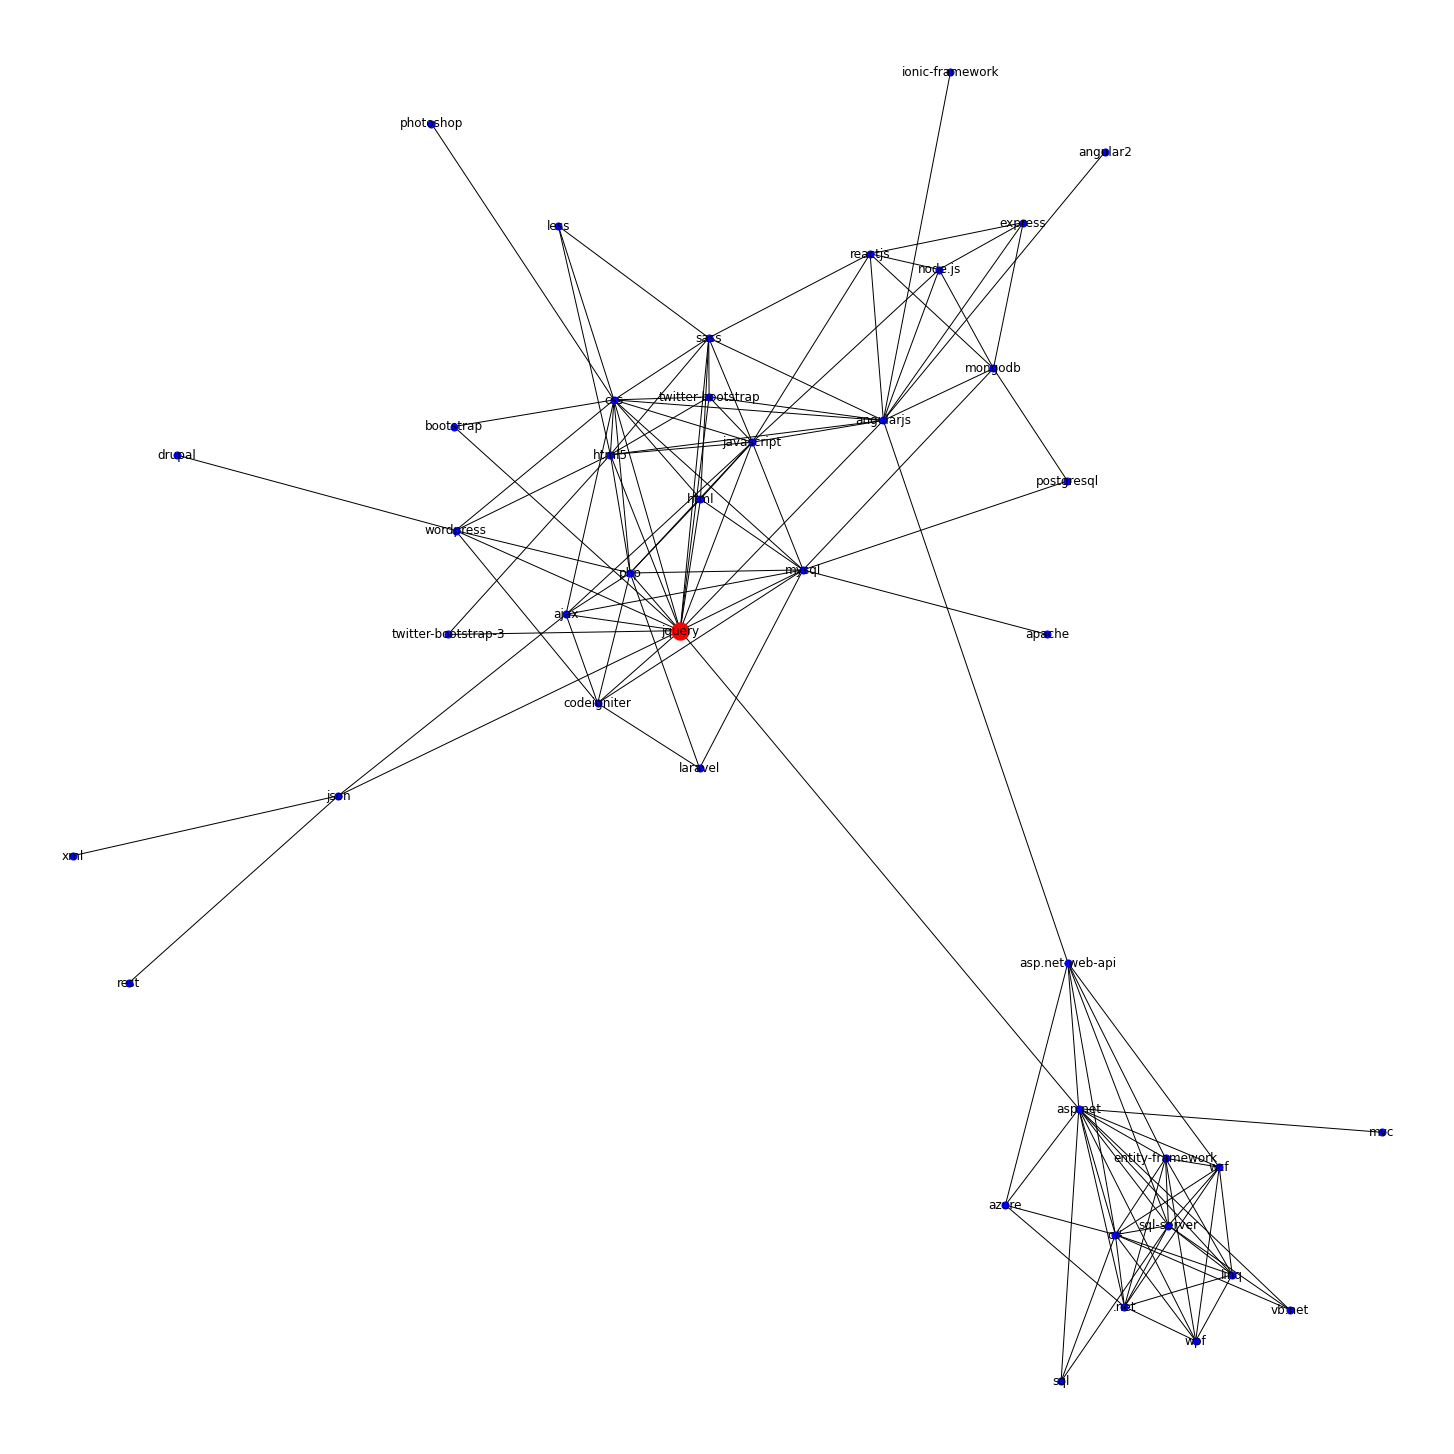

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
show_ego(largest_ccs,1,2)

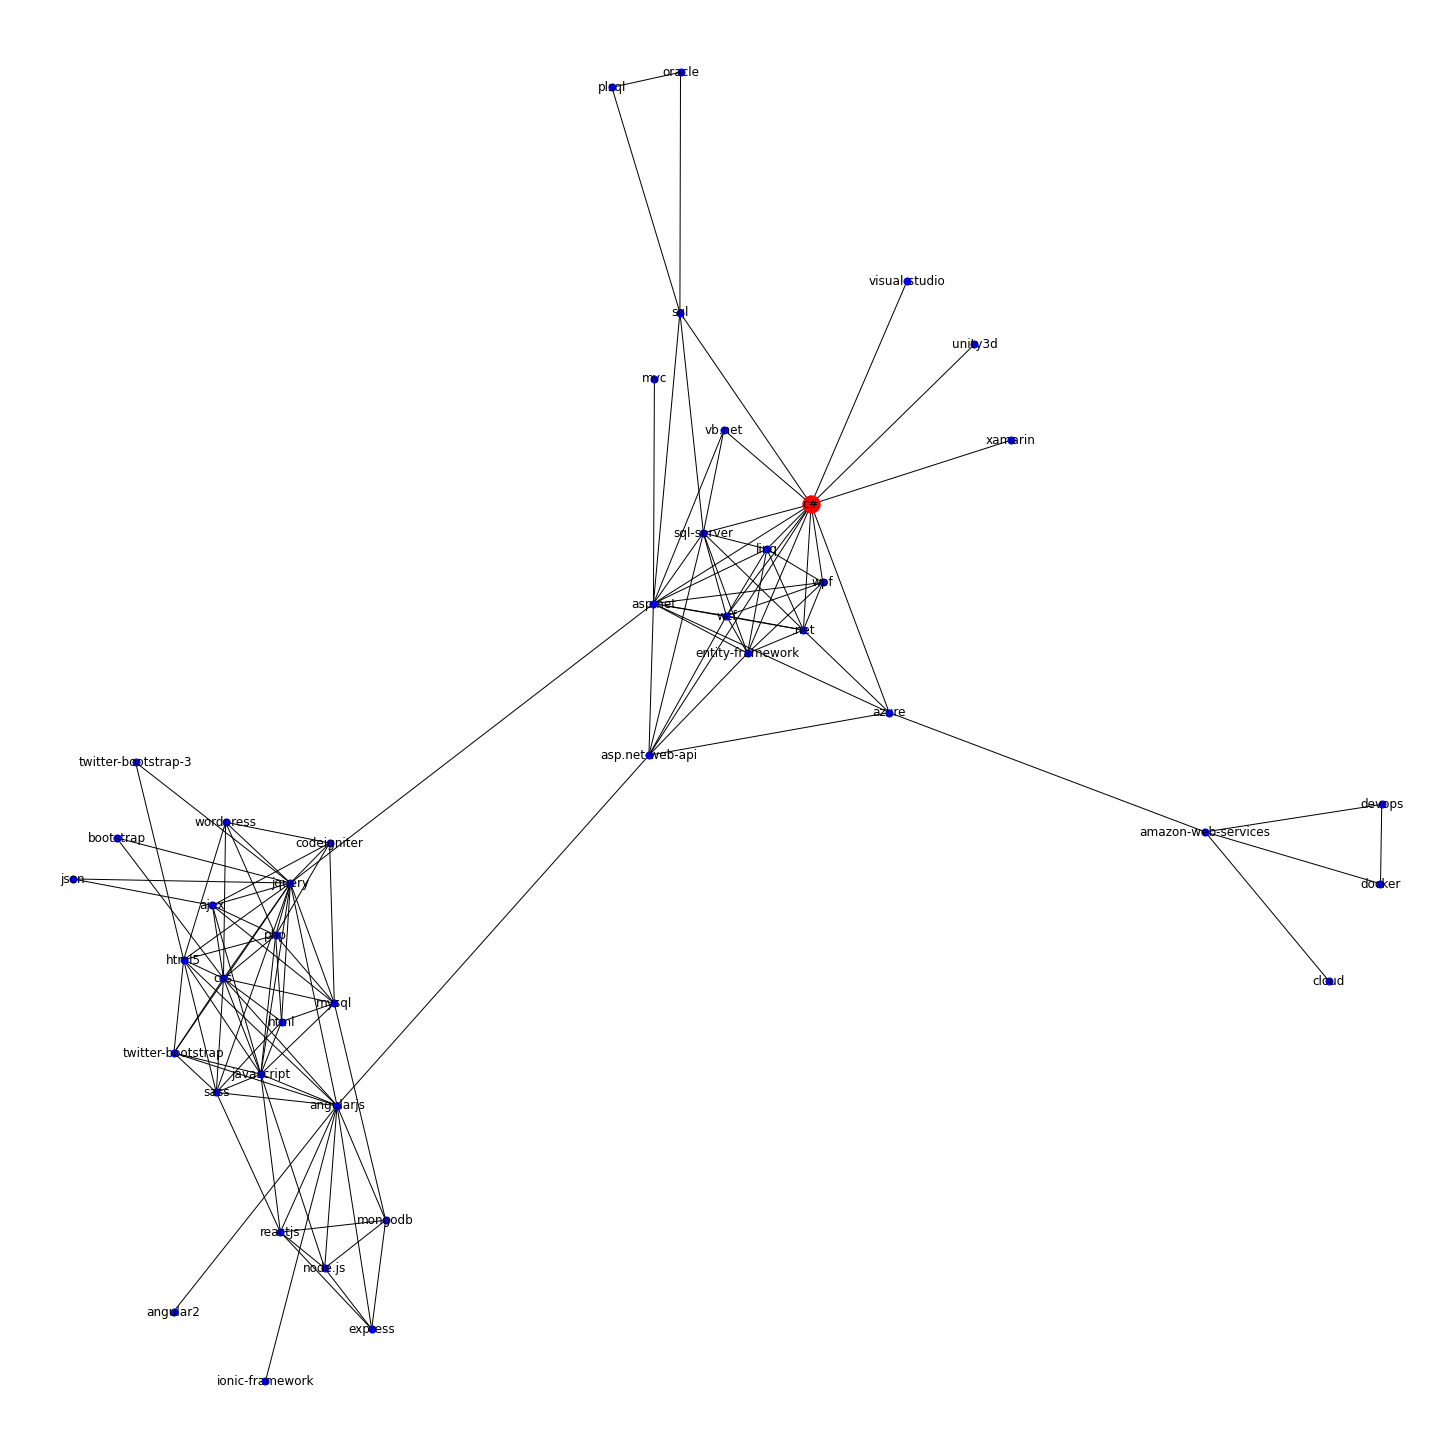

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(20, 20))
show_ego(largest_ccs,2,3)

In [14]:
def find_nodes_with_highest_kpi(G,kpi_of_int):

    # Compute the degree centrality of G: deg_cent
    if kpi_of_int == 'degree_centrality':
        kpi = nx.degree_centrality(G)
    elif kpi_of_int == 'betweenness_centrality':
        kpi = nx.betweenness_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(kpi.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in kpi.items():
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
             nodes.add(k)
            
    return nodes 

The most important tags in defining the domains that the resources belong to

In [15]:
print('Number of Nodes',len(largest_ccs.nodes()))
mc = list(nx.find_cliques(largest_ccs))
print('Number of Maximal Cliques:',len(mc))
largest_clique = sorted(mc, key=lambda x: len(x))[-1]
print(len(largest_clique),'Members:',largest_clique)

Number of Nodes 102
Number of Maximal Cliques: 83
7 Members: ['jquery', 'css', 'javascript', 'html5', 'twitter-bootstrap', 'sass', 'angularjs']


In [16]:
top_dog_d = find_nodes_with_highest_kpi(largest_ccs,'degree_centrality')
deg_cent = nx.degree_centrality(largest_ccs)
bet_cent = nx.betweenness_centrality(largest_ccs)

key = list(top_dog_d)[0]
print(top_dog_d, 'degree_cent:',deg_cent[key],'degree: ',largest_ccs.degree(key),'between_cent:',bet_cent[key])

top_dog_b = find_nodes_with_highest_kpi(largest_ccs,'betweenness_centrality')

key = list(top_dog_b)[0]
print(top_dog_b, 'degree_cent:',deg_cent[key],'degree: ',largest_ccs.degree(key),'between_cent:',bet_cent[key])

{'jquery'} degree_cent: 0.15841584158415842 degree:  16 between_cent: 0.3259273230102583
{'jquery'} degree_cent: 0.15841584158415842 degree:  16 between_cent: 0.3259273230102583


In [17]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(largest_ccs)

In [18]:
top_level_communities = next(communities_generator)
top_level_communities

({'.net',
  'asp.net',
  'asp.net-web-api',
  'azure',
  'c#',
  'entity-framework',
  'linq',
  'mvc',
  'oracle',
  'plsql',
  'sql',
  'sql-server',
  'unity3d',
  'vb.net',
  'visual-studio',
  'wcf',
  'wpf',
  'xamarin'},
 {'ajax',
  'amazon-web-services',
  'android',
  'android-studio',
  'angular',
  'angular2',
  'angularjs',
  'apache',
  'api',
  'bash',
  'bootstrap',
  'c',
  'c++',
  'cloud',
  'codeigniter',
  'css',
  'devops',
  'django',
  'docker',
  'drupal',
  'eclipse',
  'elasticsearch',
  'embedded',
  'express',
  'flask',
  'git',
  'github',
  'go',
  'hibernate',
  'html',
  'html5',
  'ionic-framework',
  'ios',
  'iphone',
  'java',
  'java-ee',
  'javascript',
  'jenkins',
  'jquery',
  'json',
  'jsp',
  'laravel',
  'less',
  'linux',
  'machine-learning',
  'matlab',
  'maven',
  'mongodb',
  'mysql',
  'nginx',
  'node.js',
  'objective-c',
  'osx',
  'photoshop',
  'php',
  'postgresql',
  'powershell',
  'python',
  'qt',
  'r',
  'react-native',
 

In [19]:
from scipy.sparse import coo_matrix
num_nodes = len(largest_ccs.nodes())
node_lookup = dict(zip(largest_ccs.nodes(),range(len(largest_ccs.nodes()))))

edges = largest_ccs.edges()
row = []
col=[]
data=[]
for n1,n2 in edges:
    row.append(node_lookup[n1])
    col.append(node_lookup[n2])
    data.append(1.0/nx.degree(largest_ccs,n2))
    row.append(node_lookup[n2])
    col.append(node_lookup[n1])
    data.append(1.0/nx.degree(largest_ccs,n1))
    
M = coo_matrix((data, (row, col)), shape=(num_nodes,num_nodes)).toarray()

In [20]:
import numpy as np


In [21]:
import math
e = np.repeat(1, M.shape[1]).reshape((M.shape[1],1))
E = e.dot(e.T)
r = np.repeat(1/M.shape[1], M.shape[1])
beta = 0.9
M = beta*M+(1-beta)*(1/M.shape[1])*E
M = M/sum(M)

ctr = 0
thres = 0.0000001
movement = 1 
while movement > thres and ctr < 100:
    r_new = M.dot(r)
    delta = r_new-r
    movement = math.sqrt(delta.dot(delta))
    print(movement)
    r = r_new
    ctr = ctr+1

0.07562063954436889
0.04075643927650996
0.01816458386390904
0.010623497414057994
0.006047029418677572
0.004043931643246515
0.0026696435937424413
0.0020412200190975437
0.0014565182213038743
0.0011841360595759474
0.0008724785398691641
0.0007220778854206768
0.0005406426499584473
0.00044870699339942354
0.00033989000341888586
0.0002815700010333493
0.00021562358512024454
0.00017804583020767135
0.0001379342594592575
0.00011350583812544003
8.907791635313502e-05
7.308847710107124e-05
5.819764563553083e-05
4.7664448420253264e-05
3.856542675285854e-05
3.158039766926727e-05
2.5988166572148228e-05
2.132232620231852e-05
1.7846124736577914e-05
1.4703343646606942e-05
1.250163772764913e-05
1.0363710500484131e-05
8.931760200975091e-06
7.460268497208259e-06
6.49828023895266e-06
5.471828014090788e-06
4.802949394877494e-06
4.076505506355676e-06
3.596292578152845e-06
3.0745827319271414e-06
2.7205242049871735e-06
2.3405808556997053e-06
2.0742314394962124e-06
1.7940188638160114e-06
1.5908028248327032e-06
1.38

In [22]:
def getNodes(node_list):
    my_dict = {}
    for n,v in node_lookup.items():
        if v in node_list:
            my_dict[v] = n
    return my_dict

from operator import itemgetter
top_pr = sorted(list(zip(range(num_nodes),r)),key=itemgetter(1), reverse=True)[:5]
my_dict = getNodes([x for x,y in top_pr])
print(top_pr)

for myid,pr in top_pr:
    print(my_dict[myid],pr)

[(40, 0.027528102446668905), (11, 0.02635197275840567), (8, 0.025560700634109004), (13, 0.023317217377983944), (28, 0.022920115525294382)]
linux 0.027528102446668905
jquery 0.02635197275840567
c# 0.025560700634109004
css 0.023317217377983944
angularjs 0.022920115525294382


In [23]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
prs = pagerank(mygraph)
{k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

{'.net': 0.011429881400234675,
 'agile': 0.008695652173913044,
 'ajax': 0.010252507675556941,
 'amazon-web-services': 0.010328160467189137,
 'android': 0.0077571105905048735,
 'android-studio': 0.003502255236105238,
 'angular': 0.00456601878559125,
 'angular2': 0.005845058885372686,
 'angularjs': 0.019558438311519058,
 'apache': 0.0066549678699685455,
 'apache-spark': 0.00855404749783867,
 'api': 0.003086675546141061,
 'asp.net': 0.019043369802028334,
 'asp.net-web-api': 0.01026193370475977,
 'azure': 0.008563616287041475,
 'bash': 0.008132351067896787,
 'bootstrap': 0.0036720105851927526,
 'c': 0.01023680338030795,
 'c#': 0.02238257198872127,
 'c++': 0.01023680338030795,
 'cloud': 0.0034993779081418865,
 'codeigniter': 0.009121117745676767,
 'css': 0.01971234160672407,
 'devops': 0.007969086479558803,
 'django': 0.007558314804984081,
 'docker': 0.010986231712160273,
 'drupal': 0.0026630489729001696,
 'eclipse': 0.0031320151695322035,
 'elasticsearch': 0.004485224040798383,
 'embedded'

DIFFERENT COMMUNITIES OF TAG

In [24]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(mygraph)
printed_set = []
for i in range(10):
    next_level_communities = next(communities_generator)
    lengths = [len(x) for x in next_level_communities]
    skip = np.argmax(lengths)
    for indx,community in enumerate(next_level_communities):
        if skip != indx and next_level_communities[indx] not in printed_set:
            print(next_level_communities[indx])
            printed_set.append(next_level_communities[indx])

{'entity-framework', 'plsql', 'mvc', 'wcf', 'azure', 'wpf', 'xamarin', 'asp.net-web-api', 'asp.net', 'sql-server', 'sql', 'visual-studio', '.net', 'c#', 'unity3d', 'linq', 'oracle', 'vb.net'}
{'tdd', 'agile'}
{'haskell', 'scala', 'hadoop', 'apache-spark'}
{'excel', 'vba', 'excel-vba'}
{'regex', 'perl'}
{'selenium', 'testing'}
{'ruby', 'twitter-bootstrap', 'express', 'drupal', 'ionic-framework', 'ruby-on-rails', 'laravel', 'mysql', 'postgresql', 'wordpress', 'javascript', 'css', 'redux', 'html', 'reactjs', 'jquery', 'angular', 'react-native', 'twitter-bootstrap-3', 'photoshop', 'elasticsearch', 'html5', 'codeigniter', 'sass', 'ajax', 'angular2', 'less', 'node.js', 'mongodb', 'xml', 'vue.js', 'typescript', 'redis', 'json', 'bootstrap', 'php', 'angularjs'}
{'windows', 'iphone', 'cloud', 'apache', 'ubuntu', 'powershell', 'github', 'shell', 'docker', 'nginx', 'osx', 'git', 'devops', 'unix', 'ios', 'android', 'objective-c', 'jenkins', 'xcode', 'swift', 'amazon-web-services', 'bash', 'linux',

In [25]:
import networkx.algorithms.community as nxcom

In [26]:
communities = sorted(nxcom.greedy_modularity_communities(mygraph), key=len, reverse=True)
# Count the communities
print(f"The graph has {len(communities)} communities.")
for community in communities:
    print(community)

The graph has 13 communities.
frozenset({'ruby', 'twitter-bootstrap', 'express', 'drupal', 'ruby-on-rails', 'laravel', 'mysql', 'postgresql', 'wordpress', 'javascript', 'css', 'redux', 'html', 'php', 'reactjs', 'jquery', 'react-native', 'photoshop', 'twitter-bootstrap-3', 'elasticsearch', 'sass', 'codeigniter', 'html5', 'ajax', 'less', 'node.js', 'mongodb', 'vue.js', 'redis', 'bootstrap', 'ionic-framework', 'angularjs'})
frozenset({'entity-framework', 'plsql', 'mvc', 'wcf', 'azure', 'wpf', 'xamarin', 'asp.net-web-api', 'asp.net', 'sql-server', 'sql', 'visual-studio', '.net', 'c#', 'unity3d', 'linq', 'oracle', 'vb.net'})
frozenset({'spring-mvc', 'web-services', 'eclipse', 'spring-boot', 'java-ee', 'maven', 'rest', 'json', 'api', 'java', 'xml', 'hibernate', 'spring', 'jsp'})
frozenset({'windows', 'git', 'nginx', 'github', 'apache', 'unix', 'ubuntu', 'bash', 'powershell', 'linux', 'shell'})
frozenset({'qt', 'c++', 'flask', 'r', 'python', 'embedded', 'matlab', 'machine-learning', 'c', 'dja

In [27]:
def spectral_clustering(mygraph,num_evs):
    ordered_nodes=sorted(list(mygraph.nodes()))
    L=nx.laplacian_matrix(mygraph,ordered_nodes)
    eig_val, eig_vec = np.linalg.eig(L.todense())
    idx = eig_val.argsort()[1:num_evs+1]   
    eigenValues = eig_val[idx]
    eigenVectors = eig_vec[:,idx]
    print(eigenValues)
    sec_eigen_v = eigenVectors[:,0].reshape(1,-1).tolist()[0]
    print(sec_eigen_v)
    myDataLists = []
    for i in range(1,num_evs+1):
        myDataLists.append(eig_vec[:,i].reshape(1,-1).tolist()[0])
#     print(sec_eigen_v)
    plt.hist(sec_eigen_v)
    plt.show()
    my_labels = [np.sign(x) for x in sec_eigen_v]
    for node,node_title in enumerate(ordered_nodes):
        mygraph.nodes[node_title]["segment"]=my_labels[node]
    nx.draw(mygraph,with_labels=True,nodelist=ordered_nodes,node_color=[mygraph.nodes[node]['segment'] for node in ordered_nodes],cmap = plt.cm.autumn)
    plt.show()
    return np.array(myDataLists)

CLUSTERING

[-4.14702167e-16+0.00000000e+00j -2.75621678e-16-3.01548914e-16j
 -2.75621678e-16+3.01548914e-16j  2.12599018e-16+0.00000000e+00j
  7.85005824e-16+0.00000000e+00j  7.85295607e-02+0.00000000e+00j
  1.40529779e-01+0.00000000e+00j  1.92862253e-01+0.00000000e+00j]
[(-0.05990945720492369+0j), (0.22721387854461828+0j), (-0.059909457204925284+0j), (-0.059909457204923036+0j), (-0.0599094572049274+0j), (-0.059909457204927886+0j), (-0.0599094572049254+0j), (-0.059909457204925125+0j), (-0.059909457204925104+0j), (-0.05990945720492526+0j), (-0.23567394239721315+0j), (-0.05990945720492608+0j), (-0.059909457204923654+0j), (-0.05990945720492375+0j), (-0.059909457204923355+0j), (-0.059909457204925964+0j), (-0.059909457204925326+0j), (-0.05990945720492636+0j), (-0.05990945720492346+0j), (-0.0599094572049263+0j), (-0.059909457204922446+0j), (-0.05990945720492516+0j), (-0.05990945720492509+0j), (-0.059909457204923834+0j), (-0.059909457204925715+0j), (-0.05990945720492371+0j), (-0.059909457204924986+0j), 

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


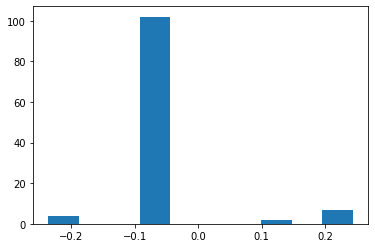

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


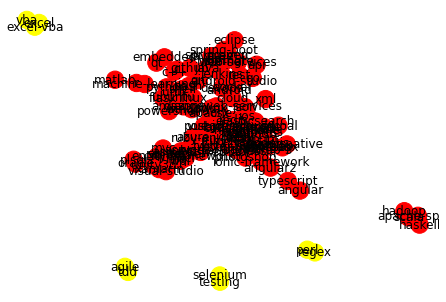

In [28]:
data_for_clustering = spectral_clustering(mygraph,8) 

In [29]:
data_for_clustering.shape

(8, 115)

In [30]:
import pandas as pd
myDF = pd.DataFrame(data_for_clustering.T)

In [31]:
myDF.shape

(115, 8)

In [32]:
ordered_nodes=sorted(list(mygraph.nodes()))
myDF['tags']=ordered_nodes

In [33]:
myDF

,0,1,2,3,4,5,6,7,tags
0,-7.498679e-03+0.000000e+00j,6.339007e-02+0.000000e+00j,7.569522e-03+0.000000e+00j,8.360631e-02+0.000000e+00j,7.716919e-03+0.000000e+00j,-6.923399e-03+0.000000e+00j,-4.570313e-03+0.000000e+00j,4.429816e-04+0.000000e+00j,.net
1,-1.088311e-16+0.000000e+00j,-2.793808e-17+0.000000e+00j,-2.745129e-17+0.000000e+00j,-6.106746e-17+0.000000e+00j,5.087772e-17+0.000000e+00j,7.794827e-18+0.000000e+00j,2.854820e-17+0.000000e+00j,-6.818929e-17+0.000000e+00j,agile
2,7.090274e-02+0.000000e+00j,7.139080e-03+0.000000e+00j,-4.051697e-03+0.000000e+00j,6.509880e-03+0.000000e+00j,6.956712e-02+0.000000e+00j,-1.156721e-01+0.000000e+00j,1.993280e-01+0.000000e+00j,-3.642505e-02+0.000000e+00j,ajax
3,-2.148062e-05+0.000000e+00j,-6.431555e-03+0.000000e+00j,-3.358118e-03+0.000000e+00j,-9.695063e-03+0.000000e+00j,8.854471e-04+0.000000e+00j,-9.301554e-05+0.000000e+00j,-1.165636e-03+0.000000e+00j,-4.601561e-04+0.000000e+00j,amazon-web-services
4,-4.401986e-06+0.000000e+00j,-1.719074e-06+0.000000e+00j,-5.884375e-06+0.000000e+00j,1.747609e-05+0.000000e+00j,-6.661637e-06+0.000000e+00j,2.679276e-05+0.000000e+00j,-1.934067e-04+0.000000e+00j,-1.405031e-03+0.000000e+00j,android
...,...,...,...,...,...,...,...,...,...
110,7.832066e-02+0.000000e+00j,7.834810e-03+0.000000e+00j,-4.460747e-02+0.000000e+00j,2.738702e-02+0.000000e+00j,-2.021595e-02+0.000000e+00j,4.512753e-02+0.000000e+00j,-4.028773e-02+0.000000e+00j,1.454174e-02+0.000000e+00j,wordpress
111,-5.357624e-03+0.000000e+00j,6.367955e-02+0.000000e+00j,1.520881e-02+0.000000e+00j,8.337965e-02+0.000000e+00j,1.954273e-03+0.000000e+00j,-2.842752e-03+0.000000e+00j,2.030827e-03+0.000000e+00j,-4.031921e-04+0.000000e+00j,wpf
112,-7.027680e-03+0.000000e+00j,6.785280e-02+0.000000e+00j,5.974142e-03+0.000000e+00j,5.058906e-03+0.000000e+00j,-1.563532e-03+0.000000e+00j,3.422144e-04+0.000000e+00j,2.635014e-04+0.000000e+00j,-1.850540e-05+0.000000e+00j,xamarin
113,-3.354442e-06+0.000000e+00j,-3.672547e-07+0.000000e+00j,-2.465616e-06+0.000000e+00j,-2.142707e-06+0.000000e+00j,-3.454613e-05+0.000000e+00j,-2.993273e-04+0.000000e+00j,4.885135e-04+0.000000e+00j,4.156970e-03+0.000000e+00j,xcode


/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:1564: ComplexWarning: Casting complex values to real discards the imaginary part
  X = X.astype(np.double)


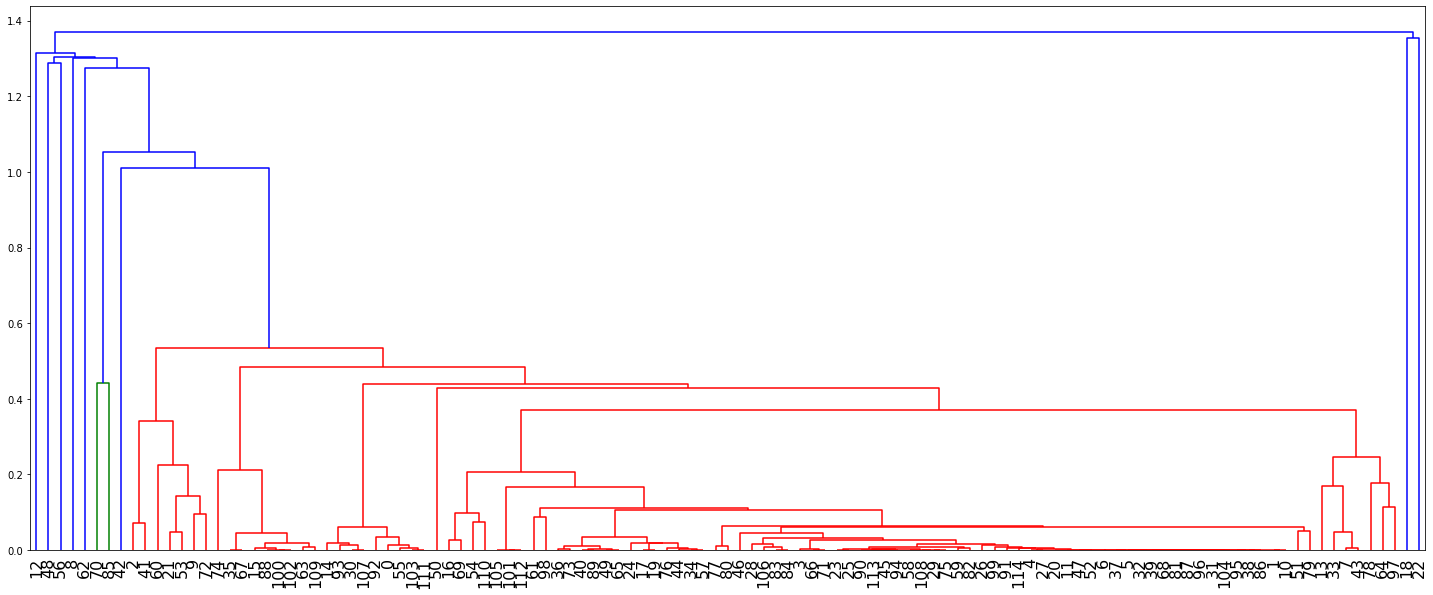

In [34]:
from scipy.cluster.hierarchy import dendrogram,linkage
z=linkage(data_for_clustering.T,'ward')
plt.figure(figsize=(25,10))
dendrogram(z,leaf_rotation=90., leaf_font_size=16.)
plt.show()

In [35]:
z.shape

(114, 4)

In [36]:
from scipy.cluster.hierarchy import fcluster
output_cluster = fcluster(z, 20, criterion='maxclust')

In [37]:
myDF['cluster'] = output_cluster

In [38]:
myDF

,0,1,2,3,4,5,6,7,tags,cluster
0,-7.498679e-03+0.000000e+00j,6.339007e-02+0.000000e+00j,7.569522e-03+0.000000e+00j,8.360631e-02+0.000000e+00j,7.716919e-03+0.000000e+00j,-6.923399e-03+0.000000e+00j,-4.570313e-03+0.000000e+00j,4.429816e-04+0.000000e+00j,.net,10
1,-1.088311e-16+0.000000e+00j,-2.793808e-17+0.000000e+00j,-2.745129e-17+0.000000e+00j,-6.106746e-17+0.000000e+00j,5.087772e-17+0.000000e+00j,7.794827e-18+0.000000e+00j,2.854820e-17+0.000000e+00j,-6.818929e-17+0.000000e+00j,agile,11
2,7.090274e-02+0.000000e+00j,7.139080e-03+0.000000e+00j,-4.051697e-03+0.000000e+00j,6.509880e-03+0.000000e+00j,6.956712e-02+0.000000e+00j,-1.156721e-01+0.000000e+00j,1.993280e-01+0.000000e+00j,-3.642505e-02+0.000000e+00j,ajax,5
3,-2.148062e-05+0.000000e+00j,-6.431555e-03+0.000000e+00j,-3.358118e-03+0.000000e+00j,-9.695063e-03+0.000000e+00j,8.854471e-04+0.000000e+00j,-9.301554e-05+0.000000e+00j,-1.165636e-03+0.000000e+00j,-4.601561e-04+0.000000e+00j,amazon-web-services,11
4,-4.401986e-06+0.000000e+00j,-1.719074e-06+0.000000e+00j,-5.884375e-06+0.000000e+00j,1.747609e-05+0.000000e+00j,-6.661637e-06+0.000000e+00j,2.679276e-05+0.000000e+00j,-1.934067e-04+0.000000e+00j,-1.405031e-03+0.000000e+00j,android,11
...,...,...,...,...,...,...,...,...,...,...
110,7.832066e-02+0.000000e+00j,7.834810e-03+0.000000e+00j,-4.460747e-02+0.000000e+00j,2.738702e-02+0.000000e+00j,-2.021595e-02+0.000000e+00j,4.512753e-02+0.000000e+00j,-4.028773e-02+0.000000e+00j,1.454174e-02+0.000000e+00j,wordpress,11
111,-5.357624e-03+0.000000e+00j,6.367955e-02+0.000000e+00j,1.520881e-02+0.000000e+00j,8.337965e-02+0.000000e+00j,1.954273e-03+0.000000e+00j,-2.842752e-03+0.000000e+00j,2.030827e-03+0.000000e+00j,-4.031921e-04+0.000000e+00j,wpf,10
112,-7.027680e-03+0.000000e+00j,6.785280e-02+0.000000e+00j,5.974142e-03+0.000000e+00j,5.058906e-03+0.000000e+00j,-1.563532e-03+0.000000e+00j,3.422144e-04+0.000000e+00j,2.635014e-04+0.000000e+00j,-1.850540e-05+0.000000e+00j,xamarin,11
113,-3.354442e-06+0.000000e+00j,-3.672547e-07+0.000000e+00j,-2.465616e-06+0.000000e+00j,-2.142707e-06+0.000000e+00j,-3.454613e-05+0.000000e+00j,-2.993273e-04+0.000000e+00j,4.885135e-04+0.000000e+00j,4.156970e-03+0.000000e+00j,xcode,11


In [39]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


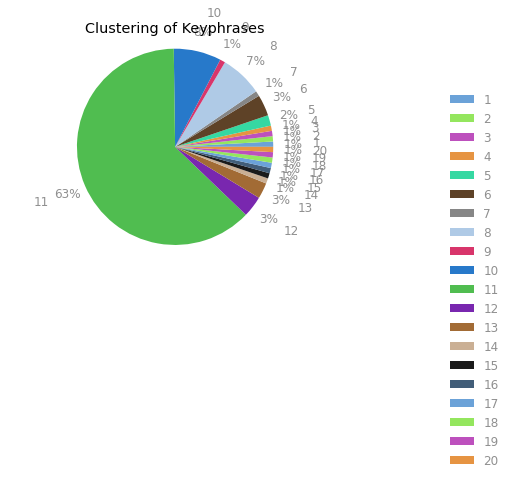

In [40]:
def make_pie(cluster_freq):
    fig, ax = plt.subplots()
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.color'] = '#909090'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size']=12
    labels = list(cluster_freq.index)
    percentages = cluster_freq.values/sum(cluster_freq.values)
    color_palette_list = [get_color(v) for v in labels]
    # explode=(0.1,0)
    ax.pie(percentages, labels=labels,  
           colors=color_palette_list, autopct='%1.0f%%', 
           shadow=False, startangle=0,   
           pctdistance=1.2,labeldistance=1.4) #explode=explode
    ax.axis('equal')
    ax.set_title("Clustering of Keyphrases")
    ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
    plt.show()

cluster_freq = myDF.cluster.value_counts().sort_index()
make_pie(cluster_freq)

In [41]:
myDF.query("cluster==3")

,0,1,2,3,4,5,6,7,tags,cluster
70,0.087268+0.000000j,0.006139+0.000000j,0.047834+0.000000j,0.004198+0.000000j,0.044837+0.000000j,-0.559417+0.000000j,-0.411465+0.000000j,-0.008124+0.000000j,php,3


RECOMMENDATION ENGINE

In [42]:
l1=['angularjs', 'javascript', 'reactjs', 'sass', 'react-native', 'ajax', 'twitter-bootstrap-3', 'postgresql', 'html5', 'laravel', 'redux', 'wordpress', 'photoshop', 'css', 'codeigniter', 'express', 'redis', 'jquery', 'mysql', 'vue.js', 'mongodb', 'node.js', 'drupal', 'elasticsearch', 'ionic-framework', 'html', 'ruby', 'bootstrap', 'twitter-bootstrap', 'ruby-on-rails', 'less', 'php']
l2=['.net', 'oracle', 'plsql', 'azure', 'vb.net', 'mvc', 'wpf', 'xamarin', 'sql', 'asp.net-web-api', 'unity3d', 'entity-framework', 'linq', 'wcf', 'visual-studio', 'asp.net', 'sql-server', 'c#']
l3=['java', 'hibernate', 'spring-mvc', 'api', 'spring-boot', 'maven', 'rest', 'web-services', 'java-ee', 'json', 'jsp', 'xml', 'spring', 'eclipse']
l4=['windows', 'ubuntu', 'github', 'git', 'unix', 'nginx', 'apache', 'linux', 'powershell', 'bash', 'shell']
l5=['python', 'r', 'c', 'c++', 'qt', 'flask', 'matlab', 'machine-learning', 'embedded', 'django']
l6=['ios', 'android', 'objective-c', 'osx', 'iphone', 'swift', 'android-studio', 'xcode']
l7=['docker', 'cloud', 'devops', 'jenkins', 'amazon-web-services', 'go']
l8=['haskell', 'scala', 'hadoop', 'apache-spark']
l9=['angular', 'angular2', 'typescript']
l10=['excel-vba', 'excel', 'vba']
l11=['agile', 'tdd']
l12=['perl', 'regex']
l13=['testing', 'selenium']

In [46]:
print("Input the tag you want to search :")
a=input()
if a in l1:
  l1.remove(a)
  print("Others tag related to your Query :")
  print(*l1,sep='\n')
  
  
elif a in l2:
  l2.remove(a)
  print("Others tag related to your Query :")
  print(*l2,sep='\n')
  

elif a in l3:
  l3.remove(a)
  print("Others tag related to your Query :")
  print(*l3,sep='\n')


elif a in l4:
  l4.remove(a)
  print("Others tag related to your Query :")
  print(*l4,sep='\n')


elif a in l5:
  l5.remove(a)
  print("Others tag related to your Query :")
  print(*l5,sep='\n')
  

elif a in l6:
  l6.remove(a)
  print("Others tag related to your Query :")
  print(*l6,sep='\n')
  

elif a in l7:
  l7.remove(a)
  print("Others tag related to your Query :")
  print(*l7,sep='\n')
  

elif a in l8:
  l8.remove(a)
  print("Others tag related to your Query :")
  print(*l8,sep='\n')
  

elif a in l9:
  l9.remove(a)
  print("Others tag related to your Query :")
  print(*l9,sep='\n')
  

elif a in l10:
  l10.remove(a)
  print("Others tag related to your Query :")
  print(*l10,sep='\n')
  

elif a in l11:
  l11.remove(a)
  print("Others tag related to your Query :")
  print(*l11,sep='\n')
  

elif a in l12:
  l12.remove(a)
  print("Others tag related to your Query :")
  print(*l12,sep='\n')
  

elif a in l13:
  l13.remove(a)
  print("Others tag related to your Query :")
  print(*l13,sep='\n')
  



Input the tag you want to search :
linux
Others tag related to your Query :
windows
ubuntu
github
git
unix
nginx
apache
powershell
bash
shell
